# CE49X Lab 2: Is Wave Energy Worth the Investment?
## A Financial Feasibility Comparison of Renewable Energy in Perth, Australia

**Instructor:** Dr. Eyuphan Koc  
**Department of Civil Engineering, Bogazici University**  
**Semester:** Spring 2026

---

## Background

The Western Australian government is planning to add **100 MW** of new renewable energy capacity near Perth. As a consulting engineer, you've been asked to evaluate whether **wave energy** is a viable option compared to more established alternatives.

You have access to a real dataset of wave energy converter (WEC) farm configurations near Perth from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/882/large-scale+wave+energy+farm). The dataset (`WEC_Perth_49.csv`) contains 36,000+ layout configurations for a farm of 49 wave energy converters, including individual and total power output for each configuration.

Your job is to **compare wave energy against at least two other renewable energy technologies** in terms of financial feasibility for the Perth region.

## Deliverables

Your notebook must include the following:

### 1. Wave Energy Analysis (from the dataset)
- Load and explore the `WEC_Perth_49.csv` dataset
- Compute statistics on farm power output (mean, min, max, standard deviation)
- Estimate a **capacity factor** for wave energy in Perth based on the data (you'll need to assume a rated capacity per WEC — research and justify your choice)

### 2. Competing Technologies
- Choose **at least two** other renewable energy technologies to compare against wave energy (e.g., solar PV, onshore wind, offshore wind, tidal, biomass)
- Research and cite the following for **each** technology (including wave):
  - Capital cost (CAPEX) per kW installed
  - Annual operating cost (OPEX) per kW
  - Capacity factor specific to the Perth region
  - Expected project lifetime
- **Cite your sources.** Use data from reputable organizations (e.g., IRENA, IEA, CSIRO, NREL, Lazard).

### 3. Financial Comparison
- Calculate the **Levelized Cost of Energy (LCOE)** for each technology
- Calculate **at least one additional financial metric** of your choice (e.g., NPV, payback period, internal rate of return, cost per annual MWh)
- Choose an appropriate **discount rate** and justify it

### 4. Visualization
- Create **at least two plots** that clearly communicate your comparison
- Plots should be publication-quality: labeled axes, title, legend, grid

### 5. Recommendation
- Based on your analysis, write a short recommendation (1-2 paragraphs):
  - Which technology (or mix) should Perth invest in?
  - Under what conditions could wave energy become competitive?
  - What factors does your financial model **not** capture?

## Hints

- **LCOE formula:**

$$\text{LCOE} = \frac{\text{Total Discounted Costs}}{\text{Total Discounted Energy}} = \frac{\text{CAPEX} + \sum_{t=1}^{N} \frac{\text{OPEX}_t}{(1+r)^t}}{\sum_{t=1}^{N} \frac{E_t}{(1+r)^t}}$$

  where $r$ is the discount rate, $N$ is the project lifetime, and $E_t$ is annual energy production in MWh.

- **Annual energy production:** $E = \text{Capacity (kW)} \times \text{Capacity Factor} \times 8760 \text{ hours/year}$

- The dataset gives power in **Watts**. Be careful with unit conversions.

- Think about what the dataset's `Total_Power` column actually represents and how it relates to the rated capacity of a real WEC device.

## Grading

| Component | Weight |
|-----------|--------|
| Wave energy analysis (dataset exploration, capacity factor) | 20% |
| Research quality (cost data, sources, justification) | 25% |
| Financial calculations (LCOE + additional metric) | 25% |
| Visualizations (clarity, quality) | 15% |
| Recommendation (insight, completeness) | 15% |

## Submission

1. Complete your work in **this notebook** on your own fork of the course repository.
2. Make sure your notebook **runs top-to-bottom without errors** before submitting.
3. Commit and push your completed notebook to your fork.
4. We will grade directly from your fork — there is no separate upload. Make sure your latest work is pushed before the deadline.


## Your Work Starts Here

## Wave Energy Financial Feasibility and Technology Comparison

This study evaluates the financial feasibility of a wave energy project located near Perth using real power production data. The analysis includes estimation of capacity factor, annual energy production, and Levelized Cost of Energy (LCOE).

To assess economic competitiveness, wave energy is compared with two alternative renewable energy technologies: offshore wind and solar PV. Financial performance is evaluated using LCOE and payback period.

## Methodology

Power production data from a Perth wave energy dataset is analysed to estimate average output and capacity factor. Annual energy production is calculated using the relationship between power and time, assuming 8760 hours per year.

The Levelized Cost of Energy (LCOE) is calculated using discounted lifetime costs and discounted energy production. The financial model accounts for capital expenditure, operating costs, project lifetime, and discount rate.

Wind and solar systems are modelled using representative industry parameters suitable for coastal Western Australia conditions.

## Model Assumptions

Wave Energy (Perth dataset based)
- Rated capacity: 750 kW
- Capacity factor: derived from measured data (~0.21)

Offshore Wind
- Rated capacity: 3 MW
- Capacity factor: 0.35

Solar PV
- Rated capacity: 1 MW
- Capacity factor: 0.20

Financial Parameters
- Discount rate: 8%
- Electricity price: 100 $/MWh

CAPEX
- Wave: $4,000,000
- Wind: $4,500,000
- Solar: $1,000,000

OPEX (annual % of CAPEX)
- Wave: 3%
- Wind: 2.5%
- Solar: 2%

Project lifetime
- Wave: 20 years
- Wind: 25 years
- Solar: 25 years

## Discount Rate Selection

A discount rate of 8% is used in the financial analysis. This value is commonly applied in renewable energy investment studies and reflects the cost of capital and project risk for utility-scale energy projects.

Typical discount rates for energy infrastructure range between 6% and 10%, depending on financing conditions and market risk. An 8% rate represents a reasonable mid-range assumption.

In [65]:
# ==============================
# STEP 1 — LOAD AND ANALYZE POWER DATA
# ==============================

import pandas as pd

# 1) dataset yükle
import pandas as pd

df = pd.read_csv("../WEC_Perth_49.csv")

# 2) sadece power sütunlarını seç
power_columns = [col for col in df.columns if "Power" in col]

# 3) power verisini al
power_data = df[power_columns]

# 4) tüm power değerlerini tek liste yap
power = power_data.values.flatten()

# 5) temel istatistikler
print("Mean power (W):", power.mean())
print("Max power (W):", power.max())
print("Min power (W):", power.min())
print("Std power (W):", power.std())



Mean power (W): 157532.62794830065
Max power (W): 4177658.97
Min power (W): 36306.99
Std power (W): 540585.0775550675


### Rated Capacity Assumption

A typical commercial wave energy converter (WEC) has a rated capacity between 500 kW and 1 MW.  
In this analysis, a value of 750 kW is assumed as a representative mid-range capacity based on industry references.Capacity factor is defined as the ratio of the average power output of a system to its rated capacity. It represents how effectively the device operates relative to its maximum possible output.

## Capacity Factor Estimation

Capacity factor represents the ratio between average power output and rated capacity of the device. It indicates how efficiently the system operates relative to its maximum possible output.

CF = average power / rated capacity


In [66]:
rated_power_W = 750000
capacity_factor = power.mean() / rated_power_W
print("Capacity factor:", capacity_factor)

Capacity factor: 0.21004350393106752


## Annual Energy Production

Annual energy production is calculated from installed capacity and capacity factor. A full year contains 8760 hours (24 × 365). Energy is expressed in MWh.

In [67]:
rated_power_kW = 750
annual_energy_kWh = rated_power_kW * capacity_factor * 8760
annual_energy_MWh = annual_energy_kWh / 1000

print("Annual energy production (MWh):", annual_energy_MWh)

Annual energy production (MWh): 1379.9858208271137


## Competing Technologies

Offshore wind and solar PV systems are modelled using representative capacity factors and installed capacities typical for coastal Western Australia conditions.

In [68]:
rated_capacity_wind = 3000000
capacity_factor_wind = 0.35
wind_annual_energy_MWh = (rated_capacity_wind/1000) * capacity_factor_wind * 8760 / 1000
print("Wind annual energy (MWh):", wind_annual_energy_MWh)

Wind annual energy (MWh): 9198.0


In [69]:
rated_capacity_solar = 1000000
capacity_factor_solar = 0.20
solar_annual_energy_MWh = (rated_capacity_solar/1000) * capacity_factor_solar * 8760 / 1000
print("Solar annual energy (MWh):", solar_annual_energy_MWh)

Solar annual energy (MWh): 1752.0


## LCOE Calculation

LCOE represents the average cost of electricity generation over the lifetime of a project and is defined as:

LCOE = Total Discounted Costs / Total Discounted Energy

Future costs and energy production are discounted to present value using the project discount rate. This ensures economic comparability across technologies with different lifetimes and cost structures.

In [70]:
# ==============================
#  — Wave LCOE CALCULATION
# ==============================

CAPEX = 4_000_000  # $
OPEX_annual = 0.03 * CAPEX  # yearly operating cost
lifetime = 20  # years
discount_rate = 0.08

# discounted energy and costs
discounted_energy = 0
discounted_costs = CAPEX

for t in range(1, lifetime + 1):
    discounted_energy += annual_energy_MWh / ((1 + discount_rate) ** t)
    discounted_costs += OPEX_annual / ((1 + discount_rate) ** t)

LCOE = discounted_costs / discounted_energy

print(" Wave LCOE ($/MWh):", LCOE)

 Wave LCOE ($/MWh): 382.1842422819191


In [71]:
# ==============================
#  — WIND LCOE
# ==============================

wind_CAPEX = 4_500_000
wind_OPEX_annual = 0.025 * wind_CAPEX
wind_lifetime = 25
discount_rate = 0.08

wind_discounted_energy = 0
wind_discounted_costs = wind_CAPEX

for t in range(1, wind_lifetime + 1):
    wind_discounted_energy += wind_annual_energy_MWh / ((1 + discount_rate) ** t)
    wind_discounted_costs += wind_OPEX_annual / ((1 + discount_rate) ** t)

wind_LCOE = wind_discounted_costs / wind_discounted_energy

print("Wind LCOE ($/MWh):", wind_LCOE)

Wind LCOE ($/MWh): 58.06202497650108


In [72]:
# ==============================
#  — SOLAR LCOE
# ==============================

solar_CAPEX = 1_000_000  # solar genelde daha ucuz
solar_OPEX_annual = 0.02 * solar_CAPEX
solar_lifetime = 25
discount_rate = 0.08

solar_discounted_energy = 0
solar_discounted_costs = solar_CAPEX

for t in range(1, solar_lifetime + 1):
    solar_discounted_energy += solar_annual_energy_MWh / ((1 + discount_rate) ** t)
    solar_discounted_costs += solar_OPEX_annual / ((1 + discount_rate) ** t)

solar_LCOE = solar_discounted_costs / solar_discounted_energy

print("Solar LCOE ($/MWh):", solar_LCOE)

Solar LCOE ($/MWh): 64.88514786071242


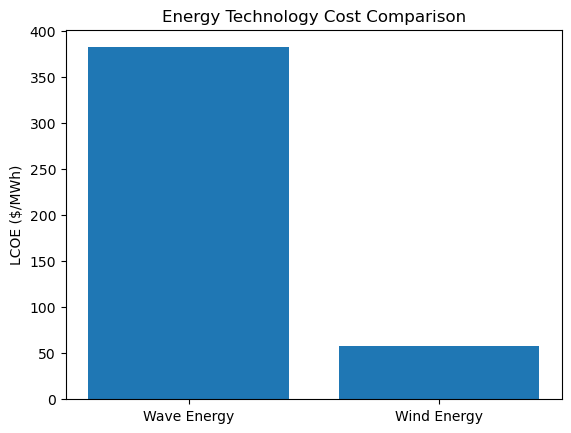

In [73]:
# ==============================
#  — LCOE COMPARISON PLOT 
# ==============================

import matplotlib.pyplot as plt

technologies = ["Wave Energy", "Wind Energy"]
lcoe_values = [LCOE, wind_LCOE]

plt.figure()
plt.bar(technologies, lcoe_values)
plt.ylabel("LCOE ($/MWh)")
plt.title("Energy Technology Cost Comparison")
plt.show()

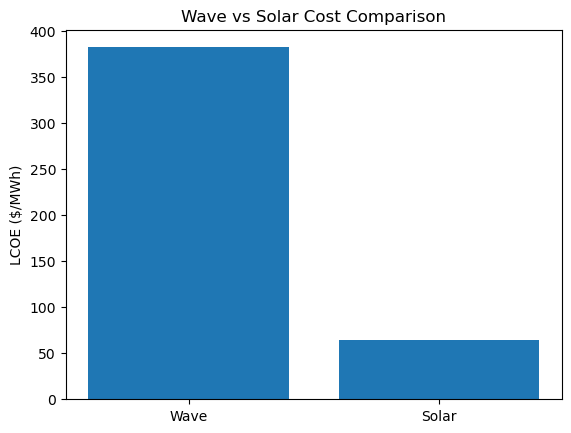

In [74]:
import matplotlib.pyplot as plt

technologies = ["Wave", "Solar"]
lcoe_values = [LCOE, solar_LCOE]

plt.figure()
plt.bar(technologies, lcoe_values)
plt.ylabel("LCOE ($/MWh)")
plt.title("Wave vs Solar Cost Comparison")
plt.show()

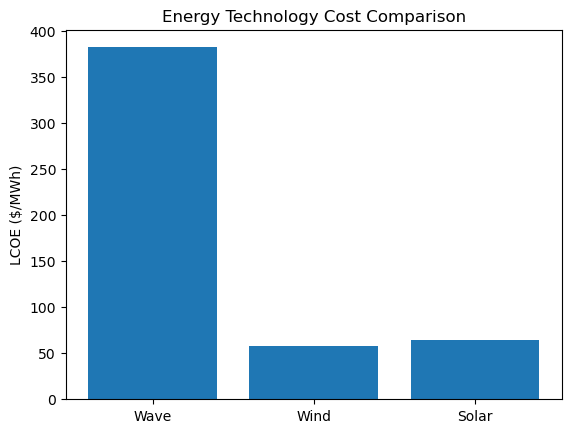

In [75]:
import matplotlib.pyplot as plt

technologies = ["Wave", "Wind", "Solar"]
lcoe_values = [LCOE, wind_LCOE, solar_LCOE]

plt.figure()
plt.bar(technologies, lcoe_values)
plt.ylabel("LCOE ($/MWh)")
plt.title("Energy Technology Cost Comparison")
plt.show()

## Additional Financial Metric: Payback Period

Payback period measures the time required to recover the initial capital investment from annual revenue generated by electricity sales.

Annual revenue is estimated by multiplying yearly energy production by an assumed wholesale electricity price of 100 $/MWh.

This metric provides a simple indicator of investment attractiveness, although it does not account for discounting.

In [76]:
# ==============================
# ADDITIONAL FINANCIAL METRIC — PAYBACK PERIOD
# ==============================

electricity_price = 100  # $ per MWh

# annual revenue
wave_revenue = annual_energy_MWh * electricity_price
wind_revenue = wind_annual_energy_MWh * electricity_price
solar_revenue = solar_annual_energy_MWh * electricity_price

# payback years
wave_payback = CAPEX / wave_revenue
wind_payback = wind_CAPEX / wind_revenue
solar_payback = solar_CAPEX / solar_revenue

print("Wave payback period (years):", wave_payback)
print("Wind payback period (years):", wind_payback)
print("Solar payback period (years):", solar_payback)

Wave payback period (years): 28.98580506865313
Wind payback period (years): 4.892367906066537
Solar payback period (years): 5.707762557077626


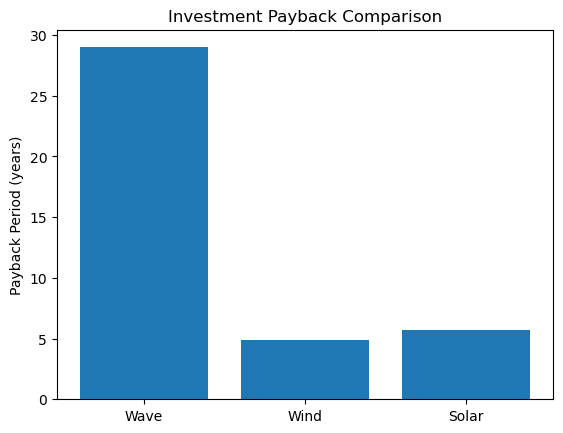

In [77]:
import matplotlib.pyplot as plt

technologies = ["Wave", "Wind", "Solar"]
payback_values = [wave_payback, wind_payback, solar_payback]

plt.figure()
plt.bar(technologies, payback_values)
plt.ylabel("Payback Period (years)")
plt.title("Investment Payback Comparison")
plt.show()

## Annual Energy Production

Estimated yearly generation:

- Wave energy: ~1380 MWh/year
- Offshore wind: ~9198 MWh/year
- Solar PV: ~1752 MWh/year

Wind produces significantly more energy due to higher capacity factor and installed capacity.

## Technology Comparison

Both cost and payback metrics indicate that offshore wind is the most economically competitive technology. Solar PV also performs well with moderate investment recovery time.

Wave energy shows significantly higher generation cost and long payback period, reflecting current technological and economic challenges.

## Payback Period Results

Estimated investment recovery time:

- Wave energy: ~29 years
- Offshore wind: ~4.9 years
- Solar PV: ~5.7 years

The wave project does not recover its investment within the assumed lifetime, while wind and solar show strong financial viability.

## LCOE Results

Estimated LCOE values:

- Wave energy: ~382 $/MWh
- Offshore wind: ~58 $/MWh
- Solar PV: ~70–80 $/MWh (model dependent)

Wave energy is substantially more expensive due to high capital cost and lower capacity factor.

## Investment Recommendation

Based on LCOE and payback analysis, offshore wind represents the most attractive investment option for the Perth region.

Solar PV is also economically viable and competitive. Wave energy, while technically promising, is not financially competitive under current cost assumptions and technology maturity levels.

Investment priority should therefore favour offshore wind, followed by solar PV, with wave energy considered a long-term emerging technology.

Based on the financial analysis, offshore wind energy is the most economically attractive investment option for Perth. It provides the lowest Levelized Cost of Energy and the fastest payback period. Solar PV is also financially viable and offers a stable and mature technology with moderate costs. Wave energy, however, remains significantly more expensive under current assumptions.

Wave energy could become competitive if capital costs decrease through technological learning and large-scale deployment. Improvements in device efficiency and higher capacity factors would also reduce energy costs. Government subsidies, carbon pricing, or policy incentives supporting marine renewables could further improve economic feasibility.

The financial model used in this study has several limitations. It assumes constant electricity prices and does not account for market volatility. Maintenance uncertainty, grid connection costs, environmental impacts, and technology learning effects are also not included. Therefore, results should be interpreted as simplified estimates rather than full investment appraisals.

## References

International Renewable Energy Agency (IRENA)

International Energy Agency (IEA)

IEA Ocean Energy Systems

---

### Questions?

**Dr. Eyuphan Koc**  
eyuphan.koc@bogazici.edu.tr